# Structure of the Notebook

1. Problem Statement
2. Data Loading and Preprocessing
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models

# 1. Problem Statement

The focus is to forecast the trend of Covid19 confirmed cases in Ireland. JHU CSSE provided confirmed cases data for the last 1 and eight months and I want to predict confirmed cases for Ireland for next 3 months.

# 2. Data Loading and Preprocessing

In [343]:
#!pip install wget

In [1]:
import pandas as pd
import numpy as np
import wget

In [2]:
#1. Download raw dataset

In [4]:
# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
    'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv',
    'https://covid19.who.int/WHO-COVID-19-global-data.csv'
]
[wget.download(url) for url in urls]


['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_vaccine_global.csv',
 'WHO-COVID-19-global-data.csv']

In [3]:
#2. Uploading datasets

In [3]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
    
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
    
df_recoveries = pd.read_csv('time_series_covid19_recovered_global.csv')

df_population = pd.read_csv('Countries_Population_Data.csv')

df_who = pd.read_csv('WHO-COVID-19-global-data.csv')

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152448,152448,152448,152583,152660,152722,152822,152960,152960,152960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14988,14988,14988,15002,15003,15014,15016,15025,15025,15025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,45583,45817,45945,46076,46340,46539,46726,46929,47079,47168


In [5]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7054,7054,7054,7076,7083,7090,7093,7101,7101,7101
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2475,2477,2478,2478,2480,2483,2486,2487,2490,2492
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4957,4984,5004,5034,5063,5096,5121,5148,5179,5209
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,129,129,129,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1138,1140,1153,1163,1166,1176,1182,1186,1192,1201


In [6]:
df_recoveries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_confirmed.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/20/21', '8/21/21', '8/22/21', '8/23/21', '8/24/21', '8/25/21',
       '8/26/21', '8/27/21', '8/28/21', '8/29/21'],
      dtype='object', length=586)

In [8]:
df_deaths.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/20/21', '8/21/21', '8/22/21', '8/23/21', '8/24/21', '8/25/21',
       '8/26/21', '8/27/21', '8/28/21', '8/29/21'],
      dtype='object', length=586)

In [9]:
df_recoveries.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/20/21', '8/21/21', '8/22/21', '8/23/21', '8/24/21', '8/25/21',
       '8/26/21', '8/27/21', '8/28/21', '8/29/21'],
      dtype='object', length=586)

In [10]:
#3. Transforming the tables from wide format to long format

In [11]:
dates = df_recoveries.columns[4:] #the three dataframes(df_confirmed,df_deaths,df_recoveries)
#have same sets of date columns


df_confirmed = df_confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='confirmed'
)


df_deaths = df_deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='deaths'
)


df_recoveries = df_recoveries.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='recoveries'
)





In [12]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [13]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,date,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [14]:
df_recoveries.head()

,Province/State,Country/Region,Lat,Long,date,recoveries
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [15]:
# grouping confirmed and deaths data by date
canada_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'Canada'].groupby('date').sum()[['confirmed']]
canada_deaths = df_deaths[df_deaths['Country/Region'] == 'Canada'].groupby('date').sum()[['deaths']]

In [16]:
# extracting the columns in recoveries table
canada_recoveries = df_recoveries[df_recoveries['Country/Region'] == 'Canada']
canada_columns = canada_recoveries[canada_recoveries.columns[:-1]].reset_index(drop=True)

In [17]:
# Joining the aggregated confirmed and deaths data with extracted columns
canada_confirmed = canada_columns.merge(canada_confirmed, how='inner', left_on='date', right_index=True)
canada_deaths = canada_columns.merge(canada_deaths, how='inner', left_on='date', right_index=True)

In [18]:
# the aggregated data for Canada added back to confirmed and deaths table
df_confirmed = df_confirmed[df_confirmed['Country/Region'] != 'Canada'].append(canada_confirmed)
df_deaths = df_deaths[df_deaths['Country/Region'] != 'Canada'].append(canada_deaths)

In [19]:
# confirmed, deaths and recoveries data joined together
data1 = df_confirmed.merge(df_deaths, how='inner',on=['Country/Region','Province/State','date'])\
.merge(df_recoveries, how='inner',on=['Country/Region','Province/State','date'])

In [20]:
data1.sample(5)

,Province/State,Country/Region,Lat_x,Long_x,date,confirmed,Lat_y,Long_y,deaths,Lat,Long,recoveries
6738,NaN,Malta,35.9375,14.3754,2/16/20,0,35.9375,14.3754,0,35.9375,14.3754,0
72537,NaN,Seychelles,-4.6796,55.4920,10/23/20,153,-4.6796,55.4920,0,-4.6796,55.4920,149
59186,Queensland,Australia,-27.4698,153.0251,9/3/20,1128,-27.4698,153.0251,6,-27.4698,153.0251,1088
29905,NaN,Nigeria,9.0820,8.6753,5/14/20,5162,9.0820,8.6753,167,9.0820,8.6753,1180
83476,Guadeloupe,France,16.2650,-61.5510,12/4/20,8427,16.2650,-61.5510,149,16.2650,-61.5510,2242


In [21]:
data1['recoveries'] = data1['recoveries'].astype("int")

In [22]:
# data1 = data1[['Province/State','Country/Region','Date','Lat','Long','Confirmed','Deaths','Recovered']]
data1 = data1[['Country/Region','date','Lat','Long','confirmed','deaths','recoveries']]

In [23]:
data1.sample(5)

,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
46428,Jordan,7/16/20,31.2400,36.5100,1206,10,1019
5614,Dominica,2/12/20,15.4150,-61.3710,0,0,0
121708,Rwanda,4/28/21,-1.9403,29.8739,24888,332,23175
74356,Pakistan,10/30/20,30.3753,69.3451,332993,6806,314066
85602,Holy See,12/12/20,41.9029,12.4534,27,0,15


In [24]:
#Population Data

In [25]:
df_population.sample(5)
# population_df[population_df['Country Name']=='West Bank and Gaza']

,Series Name,Series Code,Country Name,Country Code,2020 [YR2020]
199,"Population, total",SP.POP.TOTL,Puerto Rico,PRI,3194034
75,"Population, total",SP.POP.TOTL,Europe & Central Asia,ECS,923489941
64,"Population, total",SP.POP.TOTL,East Asia & Pacific (excluding high income),EAP,2105003391
113,"Population, total",SP.POP.TOTL,"Iran, Islamic Rep.",IRN,83992953
207,"Population, total",SP.POP.TOTL,Saudi Arabia,SAU,34813867


In [26]:
for each in data1['Country/Region'].unique():
  if each not in df_population['Country Name'].unique():
    print(each)

Bahamas
Brunei
Burma
Congo (Brazzaville)
Congo (Kinshasa)
Czechia
Diamond Princess
Egypt
Gambia
Holy See
Iran
Korea, South
Kyrgyzstan
Laos
MS Zaandam
Micronesia
Russia
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Slovakia
Summer Olympics 2020
Syria
Taiwan*
US
Venezuela
Yemen


In [27]:
#to remove countries not in population table
not_in_population_data=['Taiwan*','Summer Olympics 2020','MS Zaandam','Holy See','Diamond Princess']
not_in_population_data

['Taiwan*',
 'Summer Olympics 2020',
 'MS Zaandam',
 'Holy See',
 'Diamond Princess']

In [28]:
#removes countries not in population but in full_table
for n in not_in_population_data:
    data1 = data1[data1['Country/Region'] != n]
    print(n)

Taiwan*
Summer Olympics 2020
MS Zaandam
Holy See
Diamond Princess


In [29]:
#Matching country names. 


mapping_countries1 = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Burma': 'Myanmar',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Congo',
    'Czechia': 'Czech Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Iran': 'Iran, Islamic Rep.',
    'Korea, South': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Laos': 'Lao PDR',
    'Micronesia, South': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Slovakia': 'Slovak Republic',
    'Syria': 'Syrian Arab Republic',
    'US': 'United States',
    'Venezuela': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.'
}

In [30]:
mapping_countries1

{'Bahamas': 'Bahamas, The',
 'Brunei': 'Brunei Darussalam',
 'Burma': 'Myanmar',
 'Congo (Brazzaville)': 'Congo',
 'Congo (Kinshasa)': 'Congo',
 'Czechia': 'Czech Republic',
 'Egypt': 'Egypt, Arab Rep.',
 'Gambia': 'Gambia, The',
 'Iran': 'Iran, Islamic Rep.',
 'Korea, South': 'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Laos': 'Lao PDR',
 'Micronesia, South': 'Micronesia, Fed. Sts.',
 'Russia': 'Russian Federation',
 'Saint Kitts and Nevis': 'St. Kitts and Nevis',
 'Saint Lucia': 'St. Lucia',
 'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
 'Slovakia': 'Slovak Republic',
 'Syria': 'Syrian Arab Republic',
 'US': 'United States',
 'Venezuela': 'Venezuela, RB',
 'Yemen': 'Yemen, Rep.'}

In [31]:
#replacing the country names in full_table with population table
data1['Country/Region'] = data1['Country/Region'].replace(mapping_countries1)

In [32]:
data1.sample(5)

,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
85328,"Gambia, The",12/11/20,13.443200,-15.310100,3779,123,3645
122439,"Korea, Rep.",5/1/21,35.907757,127.766922,123240,1833,112865
128461,Georgia,5/24/21,42.315400,43.356900,337961,4639,319956
45232,West Bank and Gaza,7/11/20,31.952200,35.233200,5931,33,536
55766,Australia,8/21/20,-12.463400,130.845600,33,0,33


In [33]:
data1['active'] = data1['confirmed'] - data1['deaths'] - data1['recoveries']

In [34]:
data1.sample(5)

,Country/Region,date,Lat,Long,confirmed,deaths,recoveries,active
43307,Namibia,7/4/20,-22.957600,18.490400,375,0,25,350
64920,Sri Lanka,9/24/20,7.873054,80.771797,3333,13,3142,178
105417,Solomon Islands,2/25/21,-9.645700,160.156200,18,0,14,4
122507,Seychelles,5/1/21,-4.679600,55.492000,5873,28,5101,744
61379,Ethiopia,9/11/20,9.145000,40.489700,63367,986,24024,38357


In [35]:
# renaming columns
data1.columns = ['country', 'date', 'Lat', 'Long', 'confirmed', 'deaths', 'recoveries','active']

In [36]:

data1.sample(5)

,country,date,Lat,Long,confirmed,deaths,recoveries,active
42239,Malawi,6/30/20,-13.2543,34.3015,1224,14,260,950
69482,China,10/12/20,19.1959,109.7453,171,6,165,0
124415,Austria,5/9/21,47.5162,14.5501,631076,10382,603901,16793
75027,China,11/2/20,NaN,NaN,0,0,0,0
88413,China,12/23/20,26.0789,117.9874,507,1,485,21


In [37]:
data1['date']=data1.date.astype('datetime64[ns]')

In [38]:
data1.tail()

,country,date,Lat,Long,confirmed,deaths,recoveries,active
154699,Canada,2021-08-25,56.1304,-106.3468,1487197,26919,0,1460278
154700,Canada,2021-08-26,56.1304,-106.3468,1490617,26929,0,1463688
154701,Canada,2021-08-27,56.1304,-106.3468,1494397,26946,0,1467451
154702,Canada,2021-08-28,56.1304,-106.3468,1495859,26953,0,1468906
154703,Canada,2021-08-29,56.1304,-106.3468,1497283,26954,0,1470329


In [39]:
#new cases, new deaths, new recoveries
data1_grp=data1.groupby(['country','date'])['confirmed','deaths','recoveries','active'].sum().reset_index()

# data1_grp=data1.groupby(['country','date'])['recoveries'].sum().reset_index()

<ipython-input-39-be20f7255471>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1_grp=data1.groupby(['country','date'])['confirmed','deaths','recoveries','active'].sum().reset_index()


In [40]:
data1_grp[data1_grp['country'] == 'Canada'].tail()

,country,date,confirmed,deaths,recoveries,active
18747,Canada,2021-08-25,1487197,26919,0,1460278
18748,Canada,2021-08-26,1490617,26929,0,1463688
18749,Canada,2021-08-27,1494397,26946,0,1467451
18750,Canada,2021-08-28,1495859,26953,0,1468906
18751,Canada,2021-08-29,1497283,26954,0,1470329


In [41]:
tmp=data1_grp.groupby(['country','date'])['confirmed','deaths','recoveries'].sum().diff().reset_index()

<ipython-input-41-6d567e7ddd60>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp=data1_grp.groupby(['country','date'])['confirmed','deaths','recoveries'].sum().diff().reset_index()


In [42]:
mask=tmp['country']!=tmp['country'].shift(1)

In [43]:
tmp.loc[mask,'confirmed']=np.nan
tmp.loc[mask,'deaths']=np.nan
tmp.loc[mask,'recoveries']=np.nan

In [44]:
#renaming columns
tmp.columns=['country','date','new_cases','new_deaths','new_recoveries']

In [45]:
#merging new values
data1_grp=pd.merge(data1_grp,tmp, on=['country','date'])

In [46]:
#filling na with 0
data1_grp=data1_grp.fillna(0)

In [47]:
#fixing data types
data1_grp['new_cases']=data1_grp['new_cases'].astype('int')
data1_grp['new_deaths']=data1_grp['new_deaths'].astype('int')
data1_grp['new_recoveries']=data1_grp['new_recoveries'].astype('int')

In [48]:
data1_grp['new_cases']=data1_grp['new_cases'].apply(lambda x: 0 if x<0 else x)
data1_grp['new_deaths']=data1_grp['new_deaths'].apply(lambda x: 0 if x<0 else x)
data1_grp['new_recoveries']=data1_grp['new_recoveries'].apply(lambda x: 0 if x<0 else x)

In [49]:
data1_grp.sample(5)

,country,date,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
62030,Mali,2021-06-05,14296,518,9844,3934,9,1,77
47127,Israel,2020-09-25,222887,1446,155979,65462,8390,30,4251
99858,Timor-Leste,2020-09-16,27,0,26,1,0,0,0
23053,Costa Rica,2020-08-08,22802,228,7589,14985,721,10,323
19998,Chile,2020-04-05,4665,34,618,4013,310,7,90


In [50]:
data1_grp = data1_grp.drop(['confirmed','deaths','recoveries','active'], axis=1)

In [51]:
data1_grp.sample(5)

,country,date,new_cases,new_deaths,new_recoveries
24506,Croatia,2021-05-16,480,21,1113
48625,Jamaica,2021-08-17,630,9,0
80241,Poland,2021-07-20,103,4,0
79141,Philippines,2020-02-22,0,0,0
109818,Zambia,2020-09-14,181,8,120


In [52]:
#merging new_recoveries to data2
data1a=pd.merge(data1,data1_grp, on=['country','date'])

In [53]:

data1a[data1a['recoveries'] >0].head()

,country,date,Lat,Long,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
55,China,2020-01-22,30.975600,112.270700,444,17,28,399,0,0,0
227,Thailand,2020-01-22,15.870032,100.992541,4,0,2,2,0,0,0
305,China,2020-01-23,23.341700,113.424400,32,0,2,30,95,1,2
313,China,2020-01-23,30.975600,112.270700,444,17,28,399,95,1,2
485,Thailand,2020-01-23,15.870032,100.992541,4,0,2,2,0,0,0


In [54]:
data1[data1['recoveries'] >0].head()

,country,date,Lat,Long,confirmed,deaths,recoveries,active
55,China,2020-01-22,30.975600,112.270700,444,17,28,399
232,Thailand,2020-01-22,15.870032,100.992541,4,0,2,2
310,China,2020-01-23,23.341700,113.424400,32,0,2,30
318,China,2020-01-23,30.975600,112.270700,444,17,28,399
495,Thailand,2020-01-23,15.870032,100.992541,4,0,2,2


In [55]:
data1.shape,data1a.shape

((151774, 8), (151774, 11))

In [56]:
data1a.to_csv('COVID-19-time-series-clean-data.csv',index=False)

### Extracting confirmed cases for Ireland

#### Loading the Libraries and the Data

In [57]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev

import warnings
warnings.filterwarnings("ignore")

In [58]:
# loading the data
data3=pd.read_csv('COVID-19-time-series-clean-data.csv')

In [59]:
data3.shape

(151774, 11)

In [60]:
data3.head()

,country,date,Lat,Long,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
0,Afghanistan,2020-01-22,33.93911,67.709953,0,0,0,0,0,0,0
1,Albania,2020-01-22,41.15330,20.168300,0,0,0,0,0,0,0
2,Algeria,2020-01-22,28.03390,1.659600,0,0,0,0,0,0,0
3,Andorra,2020-01-22,42.50630,1.521800,0,0,0,0,0,0,0
4,Angola,2020-01-22,-11.20270,17.873900,0,0,0,0,0,0,0


In [61]:
data3.tail()

,country,date,Lat,Long,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
151769,Canada,2021-08-25,56.1304,-106.3468,1487197,26919,0,1460278,3537,70,0
151770,Canada,2021-08-26,56.1304,-106.3468,1490617,26929,0,1463688,3420,10,0
151771,Canada,2021-08-27,56.1304,-106.3468,1494397,26946,0,1467451,3780,17,0
151772,Canada,2021-08-28,56.1304,-106.3468,1495859,26953,0,1468906,1462,7,0
151773,Canada,2021-08-29,56.1304,-106.3468,1497283,26954,0,1470329,1424,1,0


In [62]:
#to confirm minimum and maximum dates of the data
data3.date.min(), data3.date.max()

('2020-01-22', '2021-08-29')

In [63]:
# data['date'].min(), data['date'].max() #another method to find min and max values

- I have daily covid data for a year and eight months, starting from 22-jan-20 to 29-aug-21.
- Using this historical data, I intend to forecast confirmed cases expected for next 3 months. 

I will need to do some basic exploration and find out if the given data has any trend or seasonal patterns.

In [64]:
# Focusing on Ireland, below extracts confirmed cases for Ireland
data4 = data3[data3['country'] == 'Ireland']

In [65]:
data4.head()

,country,date,Lat,Long,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
133,Ireland,2020-01-22,53.1424,-7.6921,0,0,0,0,0,0,0
391,Ireland,2020-01-23,53.1424,-7.6921,0,0,0,0,0,0,0
649,Ireland,2020-01-24,53.1424,-7.6921,0,0,0,0,0,0,0
907,Ireland,2020-01-25,53.1424,-7.6921,0,0,0,0,0,0,0
1165,Ireland,2020-01-26,53.1424,-7.6921,0,0,0,0,0,0,0


In [66]:
data4.tail()

,country,date,Lat,Long,confirmed,deaths,recoveries,active,new_cases,new_deaths,new_recoveries
150031,Ireland,2021-08-25,53.1424,-7.6921,342329,5092,0,337237,2051,18,0
150289,Ireland,2021-08-26,53.1424,-7.6921,344195,5092,0,339103,1866,0,0
150547,Ireland,2021-08-27,53.1424,-7.6921,346070,5092,0,340978,1875,0,0
150805,Ireland,2021-08-28,53.1424,-7.6921,348067,5092,0,342975,1997,0,0
151063,Ireland,2021-08-29,53.1424,-7.6921,349773,5092,0,344681,1706,0,0


In [67]:
data4.shape

(586, 11)

In [68]:
# # Extract confirmed cases for Ireland by date
# data2 = data[data['country'] == 'Ireland'].groupby('date').sum()[['confirmed']]

In [69]:
# Extract confirmed cases for Ireland by date
data5=data4.groupby('date').sum()[['confirmed']]

In [70]:
data5.head()

,confirmed
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [71]:
data5.shape

(586, 1)

In [72]:
data5.dtypes

confirmed    int64
dtype: object

In [73]:
data5=data5.reset_index()

In [74]:
data5['date'] = pd.to_datetime(data5['date'])#to change date column to datetime format as it is of type object

In [75]:
data5.index = data5['date']

### Plotting Time Series

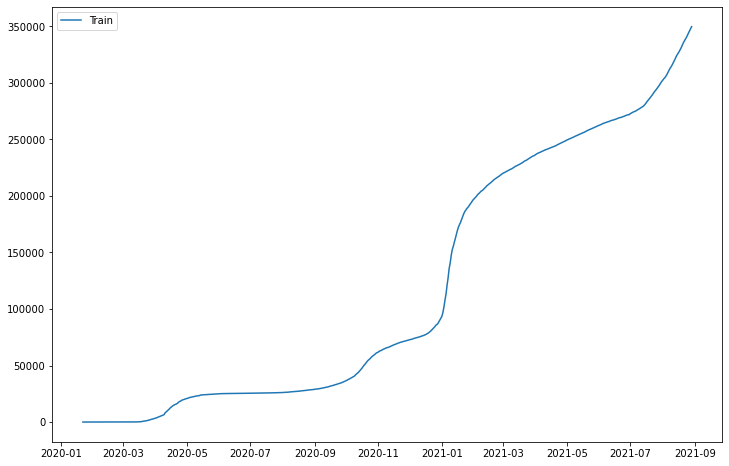

In [76]:
plt.figure(figsize=(12,8))

plt.plot(data5.index , data5['confirmed'], label='Train')
plt.legend(loc='best')
plt.show()

- Clearly this data has upward trend. 
- Let us find out if there are outliers

### Checking for Outliers in the Data

In [77]:
data5['confirmed'].describe()

count       586.000000
mean     119105.740614
std      112330.197741
min           0.000000
25%       25335.750000
50%       65774.000000
75%      238386.500000
max      349773.000000
Name: confirmed, dtype: float64

In [78]:
print('Value at 25th percentile:', (np.percentile(data5['confirmed'], 25)))
print('Value at 50th percentile:', (np.percentile(data5['confirmed'], 50)))
print('Value at 75th percentile:', (np.percentile(data5['confirmed'], 75)))
print('Value at 95th percentile:', (np.percentile(data5['confirmed'], 95)))
print('Value at 97th percentile:', (np.percentile(data5['confirmed'], 97)))
print('Value at 99th percentile:', (np.percentile(data5['confirmed'], 99)))

Value at 25th percentile: 25335.75
Value at 50th percentile: 65774.0
Value at 75th percentile: 238386.5
Value at 95th percentile: 300619.25
Value at 97th percentile: 317983.84999999986
Value at 99th percentile: 338942.64999999997


<AxesSubplot:xlabel='confirmed'>

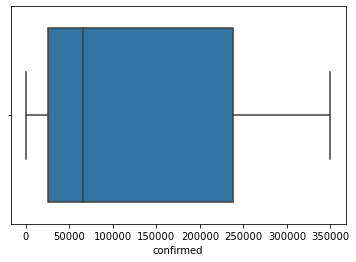

In [79]:
#no datapoint is observed to lie outside the box
sns.boxplot(data5['confirmed'])

In [80]:
#calculating whisker value
IQR = (np.percentile(data5['confirmed'], 75)) - (np.percentile(data5['confirmed'], 25))
whisker_val = (np.percentile(data5['confirmed'], 75)) + (1.5*(IQR))
whisker_val

557962.625

In [81]:
# number of values greater than whisker value is observed to be none
data5.loc[data5['confirmed']>whisker_val].shape

(0, 2)

<!-- - We can use either the 95th percentile value or whisker value to select outliers -->
- There are no points greater than the whisker value
- These series of checks have confirmed no outlier in the data
<!-- - Replace the outliers with bfill or ffill -->

### Checking for missing Date Values in Data

In [82]:
data5['date'].min(), data5['date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2021-08-29 00:00:00'))

In [83]:
print('Total days between 22-jan-20 to 28-Aug-29:', (data5['date'].max() - data5['date'].min()).days)
print('Number of rows present in the data are:', data5.shape[0])

Total days between 22-jan-20 to 28-Aug-29: 585
Number of rows present in the data are: 586


In [84]:
546/7 #number of weeks in the data is 78

78.0

In [85]:
pd.date_range(start = '2020-01-22', end = '2021-08-29' )#.difference(data2.index)# list dates bw a range of dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=586, freq='D')

In [86]:
pd.date_range(start = '2020-01-22', end = '2021-08-29' ).difference(data5.date) #checking for dates missing bw the range

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [88]:
start_date = '2020-01-22'
end_date = '2021-08-29'

In [89]:
missing_dates = pd.DataFrame(data = pd.date_range(start = start_date, end = end_date).difference(data5.index), 
                             columns= ['date']) #to find missing dates within a range and place in a dataframe

In [90]:
missing_dates.head() #no date found missing

,date


In [91]:
# meant to add missing dates to the data if any
idx = pd.date_range('2020-01-22', '2021-08-29')
data5 = data5.reindex(idx)

In [92]:
data5.tail(2)

,date,confirmed
2021-08-28,2021-08-28,348067
2021-08-29,2021-08-29,349773


In [93]:
# extract weekday from the dates
data5['date'] = data5.index
data5['weekday_name'] = data5['date'].dt.strftime("%A")
data5.shape

(586, 3)

In [94]:
data5.tail(2)

,date,confirmed,weekday_name
2021-08-28,2021-08-28,348067,Saturday
2021-08-29,2021-08-29,349773,Sunday


# Structure of the Notebook

1. Problem Statement
2. Data Loading and Preprocessing
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models

# 3. Feature Extraction and Exploration

### Decompose Series

In [95]:
data5.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=586, freq='D')

<AxesSubplot:>

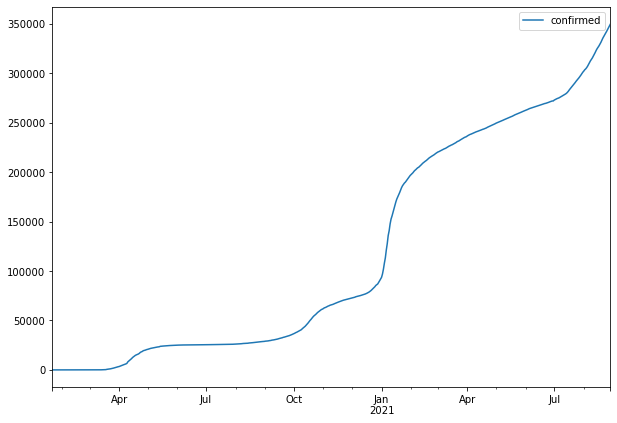

In [96]:
#viz
data5['confirmed'].plot(figsize=(10,7), legend=True)

- Based on the plot we consider this time series as additive in nature as the series shows increasing trend
- They are two forms of time series, additive and multiplicative


Multiplicative:
- Multiplicative series shows significant difference in amplitutude of peaks and troughs (i.e spikes and dips)
- Here the Trend is multiplied with the Seasonal variation i.e Trend * Seasonality * Residual

Additive:
- The spikes and dips in the series have almost equal size peaks and troughs
- In additive series the components of the series are added i.e Trend + Seasonality + Residuals

In [97]:
#library
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
#decomposition
decomposed_series = seasonal_decompose(data5['confirmed'])

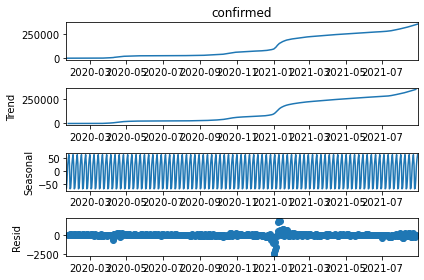

In [99]:
decomposed_series.plot(); #colon ; is to prevent two graphs from displaying
plt.show()

<AxesSubplot:>

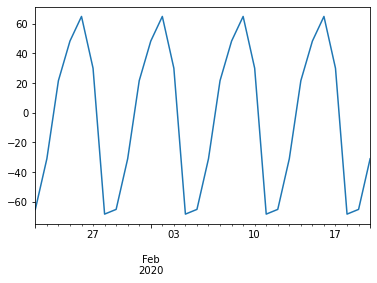

In [100]:
# considering 30 days a month 
#this is the seasonal component for 30days or 1 month
#a repeating pattern is observed, and it is repeating 4 times in a month
#so it can be concluded that this is a weekly seasonality in the data

decomposed_series.seasonal[0:30].plot() #i.e plotting the first 30 datapoints

- Plot above shows pattern repeating 4 times in a month
- This suggests weekly seasonality in the data

In [101]:
data5.head(2)

,date,confirmed,weekday_name
2020-01-22,2020-01-22,0,Wednesday
2020-01-23,2020-01-23,0,Thursday


In [102]:
data_feat = pd.DataFrame({"year": data5['date'].dt.year,
                          "month": data5['date'].dt.month,
                          "day": data5['date'].dt.day,
                          "weekday": data5['date'].dt.dayofweek,
                          "weekday_name":data5['date'].dt.strftime("%A"),
                          "dayofyear": data5['date'].dt.dayofyear,
                          "week": data5['date'].dt.week,
                          "quarter": data5['date'].dt.quarter,
                         })

In [103]:
data_feat.head(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter
2020-01-22,2020,1,22,2,Wednesday,22,4,1
2020-01-23,2020,1,23,3,Thursday,23,4,1


In [104]:
complete_data = pd.concat([data_feat, data5[['date','confirmed']]], axis=1)
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0
2020-01-23,2020,1,23,3,Thursday,23,4,1,2020-01-23,0
2020-01-24,2020,1,24,4,Friday,24,4,1,2020-01-24,0
2020-01-25,2020,1,25,5,Saturday,25,4,1,2020-01-25,0
2020-01-26,2020,1,26,6,Sunday,26,4,1,2020-01-26,0


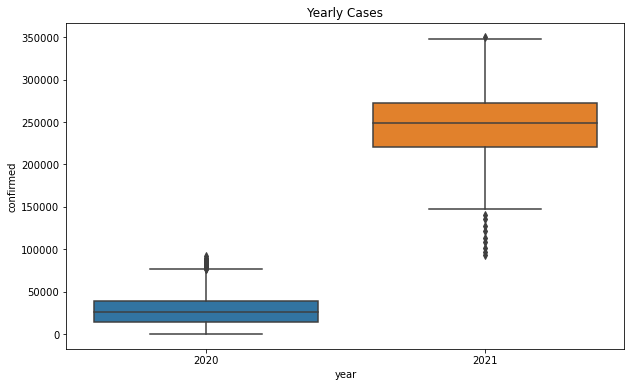

In [105]:
# boxplot for yearly Case
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['year'], y=complete_data['confirmed'], )
plt.title('Yearly Cases')
plt.show()

- It can be observed that cases have increased in 2021 as compared to 2020

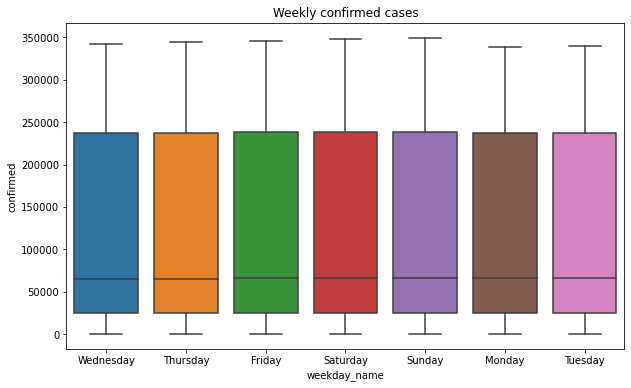

In [106]:
# boxplot for week's cases
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday_name'], y=complete_data['confirmed'], )
plt.title('Weekly confirmed cases')
plt.show()

- the data have same median almost everyday
- no particular day has a very high case throughout the dataset

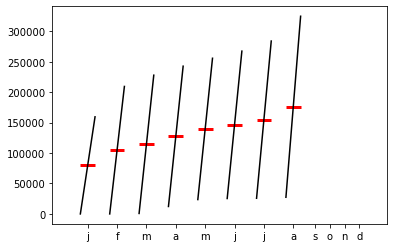

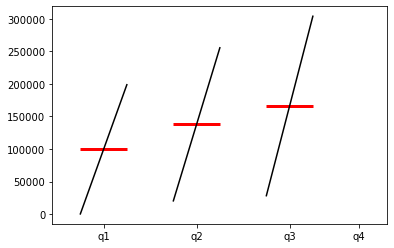

In [107]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(data5.confirmed.resample(rule='MS').mean())#compute mean for each month. MS means month stats
quarter_plot(data5.confirmed.resample(rule='Q').mean());#compute mean for each quarter. Q means quarter stats

- the black lines represents the volatality of that given month
- overall trend shows monthly and quarterly increasing trend 

#### Summarising observations:
- cases are comparatively higher in 2021
- All weekdays have similar trend on cases
- Average num. of cases are higher each consecutive month

# Structure of the Notebook

1. Problem Statement
2. Data Preprocessing(Outliers & Missing values)
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models

# 4. Data Split

In [108]:
# complete_data=complete_data.reset_index(drop=False)
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0
2020-01-23,2020,1,23,3,Thursday,23,4,1,2020-01-23,0
2020-01-24,2020,1,24,4,Friday,24,4,1,2020-01-24,0
2020-01-25,2020,1,25,5,Saturday,25,4,1,2020-01-25,0
2020-01-26,2020,1,26,6,Sunday,26,4,1,2020-01-26,0


In [109]:
complete_data.shape

(586, 10)

In [110]:
# dividing into train and test sets

test_len = int(len(complete_data) * 0.16)
data_train, data_test = complete_data.iloc[:-test_len], complete_data.iloc[-test_len:]

In [111]:
data_train.shape, data_test.shape

((493, 10), (93, 10))

In [115]:
data_train.head(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0
2020-01-23,2020,1,23,3,Thursday,23,4,1,2020-01-23,0


In [116]:
data_train.tail(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2021-05-27,2021,5,27,3,Thursday,147,21,2,2021-05-27,260389
2021-05-28,2021,5,28,4,Friday,148,21,2,2021-05-28,260850


In [117]:
data_test.head(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2021-05-29,2021,5,29,5,Saturday,149,21,2,2021-05-29,261306
2021-05-30,2021,5,30,6,Sunday,150,21,2,2021-05-30,261673


In [118]:
data_test.tail(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2021-08-28,2021,8,28,5,Saturday,240,34,3,2021-08-28,348067
2021-08-29,2021,8,29,6,Sunday,241,34,3,2021-08-29,349773


# Structure of Notebook

1. Problem Statement
2. Data Preprocessing(Outliers & Missing values)
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models

# 5. Time Series Forecasting models

#### Defining performance metrics

In [119]:
#Defining RMSLE function to provide error metrics and assess the model performance
def rmsle(actual, preds):
    for i in range(0,len(preds)):
        if preds[i]<0:
            preds[i] = 0
        else:
            pass
    
    error = (sqrt(mean_squared_log_error(actual, preds)))*100 ##multiplying by 100 since the error comes in decimal places
    return error

In [120]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### A. Holt's Winters (aka triple exponential smoothing)

Holt-Winters makes use of exponential smoothing to compute historical values in order to make predictions of current and future  values (or average) (Solarwind, 2019). Exponential smoothing is when we assign increasing weights to observations in an exponentially increasing manner from oldest to newest observations(Stephanie, 2018).
It is a model of timeseries behaviour.

In [121]:
data_train.shape, data_test.shape

((493, 10), (93, 10))

In [122]:
data_train.head(1)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0


In [123]:
data_test.tail(1)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2021-08-29,2021,8,29,6,Sunday,241,34,3,2021-08-29,349773


In [124]:
# train_hw = data_train[['confirmed','date','weekday_name']]
# test_hw = data_test[['confirmed','date','weekday_name']]

train_hw = data_train[['confirmed','date']]
test_hw = data_test[['confirmed','date']]

In [125]:
train_hw.dtypes, test_hw.dtypes

(confirmed             int64
 date         datetime64[ns]
 dtype: object,
 confirmed             int64
 date         datetime64[ns]
 dtype: object)

In [126]:
# train_df['date'] = pd.to_datetime(train_df['date'])
# train_df['date'] = pd.to_datetime(train_df['date'])

In [127]:
# # set the time as index
# train.set_index('date',inplace=True)
# valid.set_index('date',inplace=True)
train_hw.head()

,confirmed,date
2020-01-22,0,2020-01-22
2020-01-23,0,2020-01-23
2020-01-24,0,2020-01-24
2020-01-25,0,2020-01-25
2020-01-26,0,2020-01-26


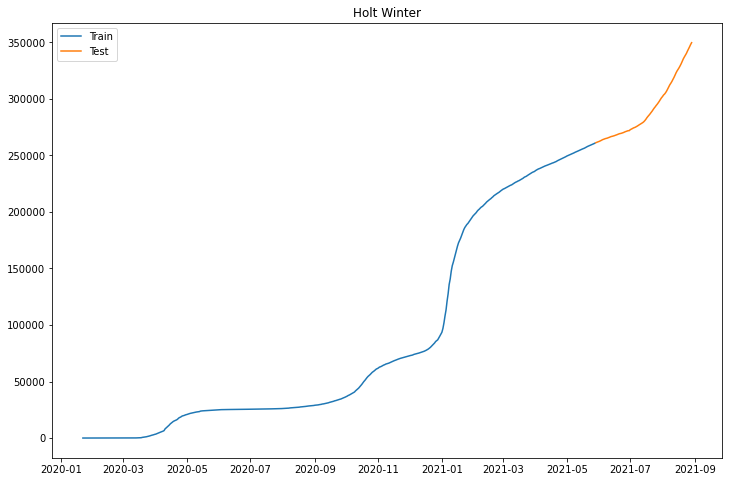

In [128]:
#viz
plt.figure(figsize=(12,8))

plt.plot(train_hw.index, train_hw['confirmed'], label='Train')
plt.plot(test_hw.index, test_hw['confirmed'], label='Test')
plt.legend(loc='best')
plt.title("Holt Winter")
plt.show()

In [129]:
#importing module
from statsmodels.tsa.api import ExponentialSmoothing

In [130]:
#training the model
model = ExponentialSmoothing(np.asarray(train_hw['confirmed']), seasonal_periods=7, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.2, smoothing_slope=0.001, smoothing_seasonal=0.2)# providing random parameter values

##### Model assessment

In [131]:
# predictions and evaluation
preds = model.forecast(len(test_hw)) 
score = rmsle(test_hw['confirmed'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 4.250603826363878


In [132]:
# MAPE(valid_df['confirmed'], preds)
print('MAPE for Holt Winter is:', MAPE(test_hw['confirmed'], preds))

MAPE for Holt Winter is: 2.996114145256824


In [133]:
# # # calculating RMSE 
# rmse = sqrt(mean_squared_error(rmsle(valid_df['confirmed'], preds))
# print(rmse)

In [134]:
# # #MAE
# print('The RMSE value for Holt Winter is', round(mean_absolute_error(rmsle(valid_df['confirmed'], preds),0)))

## Grid search

In [135]:
from itertools import product
from tqdm import tqdm_notebook

In [136]:
# setting initial values and some bounds for them
level = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
smoothing_slope = [0.0001, 0.001, 0.05] 
smoothing_seasonal = [0.2, 0.3, 0.4, 0.5, 0.6]

# creating list with all the possible combinations of parameters
parameters = product(level, smoothing_slope, smoothing_seasonal)
parameters_list = list(parameters)
len(parameters_list)

120

In [137]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        #training the model
        model = ExponentialSmoothing(np.asarray(train_hw['confirmed']), seasonal_periods=7, trend='add', seasonal='add')
        model = model.fit(smoothing_level=param[0], smoothing_slope=param[1], smoothing_seasonal=param[2])

        # predictions and evaluation
        preds = model.forecast(len(test_hw)) 
        score = rmsle(test_hw['confirmed'], preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'RMSLE']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='RMSLE', ascending=True).reset_index(drop=True)
    
    return result_table

In [138]:
result_table = grid_search(parameters_list)

In [139]:
result_table.parameters[0] #best parameter

(0.1, 0.001, 0.2)

In [140]:
#training the model
model = ExponentialSmoothing(np.asarray(train_hw['confirmed']), seasonal_periods=7, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.1, smoothing_slope=0.001, smoothing_seasonal=0.2)

##### Model assessment

In [141]:
# predictions and evaluation
preds = model.forecast(len(test_hw)) 
score = rmsle(test_hw['confirmed'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 4.196828351487393


In [142]:
# MAPE(valid_df['confirmed'], preds)
print('MAPE for Holt Winter is:', MAPE(test_hw['confirmed'], preds))

MAPE for Holt Winter is: 3.0314948570063773


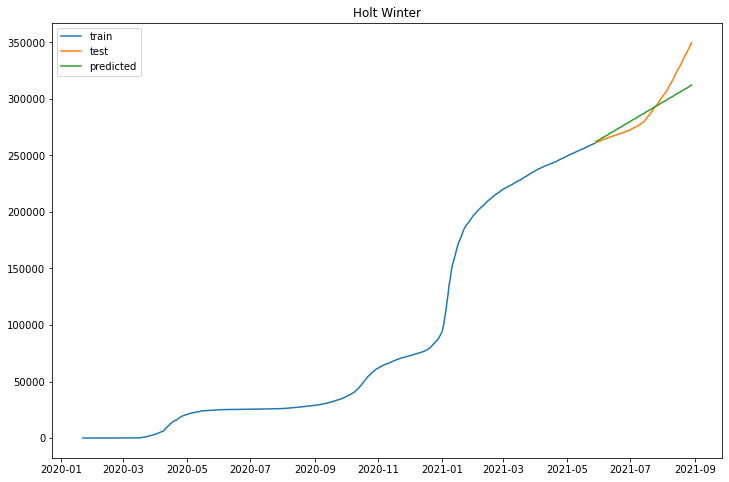

In [143]:
plt.figure(figsize = (12,8))

plt.plot(train_hw.index , train_hw['confirmed'], label = 'train')
plt.plot(test_hw.index , test_hw['confirmed'], label = 'test')
plt.plot(test_hw.index , preds, label = 'predicted')
plt.legend(loc='best')

plt.title("Holt Winter")
plt.show()

- Holt-Winter plot shows good performance for the model as the predicted values are very close to the validation data

### B. Building ARIMA and SARIMA

In [144]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# statmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
# datetime
from datetime import datetime

##### ARIMA

##### Get the data

In [145]:
train_ar = data_train[['confirmed','date']]
test_ar = data_test[['confirmed','date']]

In [146]:
train_ar.head()

,confirmed,date
2020-01-22,0,2020-01-22
2020-01-23,0,2020-01-23
2020-01-24,0,2020-01-24
2020-01-25,0,2020-01-25
2020-01-26,0,2020-01-26


In [147]:
#Libraries
from pmdarima import auto_arima

In [148]:
#forecasting model
model = auto_arima(y = train_ar['confirmed'],
                   m = 7, #seasonal perod of 7 days
                   seasonal = True,
                   stepwise = False)

In [149]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  493
Model:               SARIMAX(3, 2, 2)   Log Likelihood               -3479.556
Date:                Tue, 07 Sep 2021   AIC                           6971.112
Time:                        06:38:47   BIC                           6996.291
Sample:                             0   HQIC                          6981.000
                                - 493                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0923      0.038     28.989      0.000       1.018       1.166
ar.L2         -0.1011      0.028     -3.648      0.000      -0.155      -0.047
ar.L3         -0.3557      0.019    -18.540      0.000      -0.393      -0.318
ma.L1         -1.4830      0.034    -44.203      0.000      -1.549      -1.417
ma.L2          0.8361      0.025     34.025      0.000       0.788       0.884
sigma2      8.364e+04   1732.863     48.264      0.000    8.02e+04     8.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             21768.20
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              12.38   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
# fit model
model = ARIMA(train_ar['confirmed'], order=(3,2,2))
model_fit = model.fit()

In [151]:
test_ar.shape

(93, 2)

In [152]:
# generate forecasts
output = model_fit.forecast(93) 

In [153]:
test_ar['arima'] = (pd.DataFrame(output[0])).values

In [154]:
test_ar.tail()

,confirmed,date,arima
2021-08-25,342329,2021-08-25,310617.224458
2021-08-26,344195,2021-08-26,311223.657313
2021-08-27,346070,2021-08-27,311831.135952
2021-08-28,348067,2021-08-28,312439.660092
2021-08-29,349773,2021-08-29,313049.229674


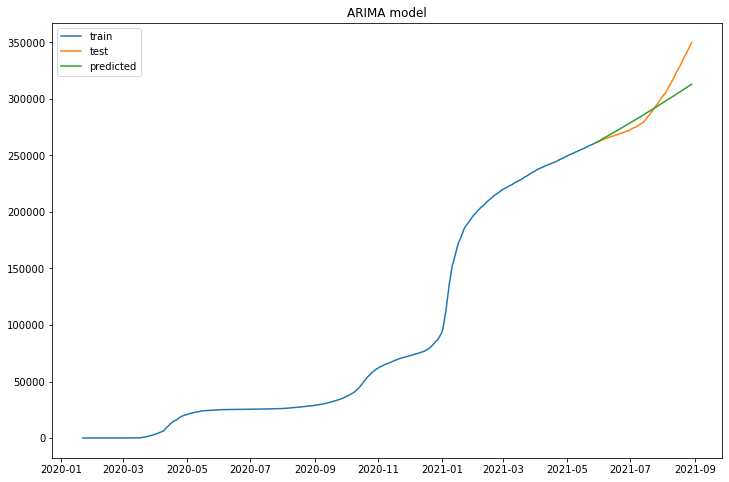

In [155]:
plt.figure(figsize=(12,8))

plt.plot(train_ar.index, train_ar['confirmed'], label='train')
plt.plot(test_ar.index, test_ar['confirmed'], label='test')
plt.plot(test_ar.index, test_ar['arima'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

- Arima plot also shows good performance for the model as the predicted values and the validation data are very close

##### Model assessment

In [156]:
# predictions and evaluation

score = rmsle(test_ar['confirmed'], test_ar['arima'])

# results
print('RMSLE for Arima is:', score)

RMSLE for Arima is: 4.0651147740355515


In [157]:
#MAPE
# MAPE(valid_ar['confirmed'], valid_ar['Arima'])
print('MAPE for Arima is:', MAPE(test_ar['confirmed'], test_ar['arima']))

MAPE for Arima is: 2.7977059429985496


### SARIMA

In [158]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [159]:
train_sa = data_train[['confirmed','date']]
test_sa = data_test[['confirmed','date']]

In [160]:
#forecasting model
model = auto_arima(y = train_sa['confirmed'],
                   m = 7, #seasonal perod of 7 days
                   seasonal = True,
                   stepwise = False,
                  trace=True)

 ARIMA(0,2,0)(0,0,0)[7]             : AIC=7082.020, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[7]             : AIC=7083.881, Time=0.12 sec
 ARIMA(0,2,0)(0,0,2)[7]             : AIC=7085.075, Time=0.41 sec
 ARIMA(0,2,0)(1,0,0)[7]             : AIC=7083.943, Time=0.05 sec
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(1,0,2)[7]             : AIC=inf, Time=2.13 sec
 ARIMA(0,2,0)(2,0,0)[7]             : AIC=7085.250, Time=0.06 sec
 ARIMA(0,2,0)(2,0,1)[7]             : AIC=7086.988, Time=0.63 sec
 ARIMA(0,2,0)(2,0,2)[7]             : AIC=inf, Time=2.57 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=7033.476, Time=0.04 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=7035.363, Time=0.18 sec
 ARIMA(0,2,1)(0,0,2)[7]             : AIC=7036.806, Time=0.38 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=7035.476, Time=0.06 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=inf, Time=0.78 sec
 ARIMA(0,2,1)(1,0,2)[7]             : AIC=7038.922, Time=0.48 sec
 ARIMA(0,2,1)(2,0,0)[7]       

In [161]:
#training the model
model = sarimax.SARIMAX(train_sa['confirmed'], seasonal_order=(0,0,0,7), order=(3,2,2))
fit1 = model.fit()

In [162]:
test_sa.head()

,confirmed,date
2021-05-29,261306,2021-05-29
2021-05-30,261673,2021-05-30
2021-05-31,262043,2021-05-31
2021-06-01,262380,2021-06-01
2021-06-02,262787,2021-06-02


In [163]:
test_sa.tail()

,confirmed,date
2021-08-25,342329,2021-08-25
2021-08-26,344195,2021-08-26
2021-08-27,346070,2021-08-27
2021-08-28,348067,2021-08-28
2021-08-29,349773,2021-08-29


In [164]:
# make predictions
test_sa['sarima'] = fit1.predict(start="2021-05-29", end="2021-08-29", dynamic=True)

##### model assessment

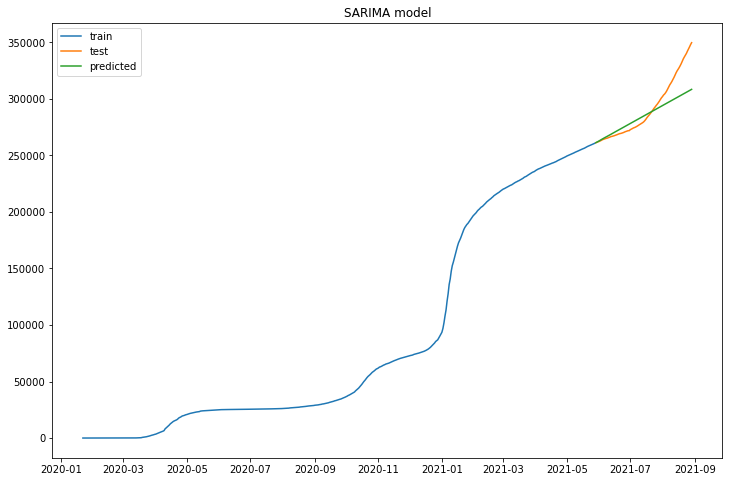

In [165]:
plt.figure(figsize=(12,8))

plt.plot(train_sa['confirmed'],  label='train') 
plt.plot(test_sa['confirmed'],  label='test')
plt.plot(test_sa['sarima'],  label='predicted') 
plt.legend(loc='best') 
plt.title("SARIMA model")
plt.show()

- plot for Sarima model shows good performance as the predicted values are close to the validation data

In [166]:
# # calculating RMSE 
# rmse = round(sqrt(mean_squared_error(valid_sar['confirmed'], valid_sar['SARIMA'])))
# print('The RMSE value for SARIMA is', rmse)

In [167]:
# predictions and evaluation

score = rmsle(test_sa['confirmed'], test_sa['sarima'])

# sarima results
print('RMSLE for Sarima is:', score)

RMSLE for Sarima is: 4.623716743711346


In [168]:
#MAPE
# MAPE(valid_ar['confirmed'], valid_ar['Arima'])
print('MAPE for Sarima is:', MAPE(test_sa['confirmed'], test_sa['sarima']))

MAPE for Sarima is: 3.0564190637283177


# Structure of the Notebook

1. Problem Statement
2. Data Preprocessing(Outliers & Missing values)
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models
7. Forecast for next 3 months

# 6. Building ML Models

In [169]:
#Table contains valuable features extracted from the data in order to find out the data patterns and explore the data
#We will use those features for this model
#So this is considered as feature-based timeseries data and build ML models using these features
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0
2020-01-23,2020,1,23,3,Thursday,23,4,1,2020-01-23,0
2020-01-24,2020,1,24,4,Friday,24,4,1,2020-01-24,0
2020-01-25,2020,1,25,5,Saturday,25,4,1,2020-01-25,0
2020-01-26,2020,1,26,6,Sunday,26,4,1,2020-01-26,0


In [170]:
# complete_data['date'] = pd.to_datetime(complete_data['date'])
# # valid['date'] = pd.to_datetime(valid['date'])

In [171]:
complete_data.dtypes

year                     int64
month                    int64
day                      int64
weekday                  int64
weekday_name            object
dayofyear                int64
week                     int64
quarter                  int64
date            datetime64[ns]
confirmed                int64
dtype: object

In [172]:
#train, validation, data_test

In [173]:
data_train.head(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0
2020-01-23,2020,1,23,3,Thursday,23,4,1,2020-01-23,0


In [174]:
data_test.tail(2)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2021-08-28,2021,8,28,5,Saturday,240,34,3,2021-08-28,348067
2021-08-29,2021,8,29,6,Sunday,241,34,3,2021-08-29,349773


In [175]:
# train.set_index('date')
# train.set_index('date',inplace=True)
# complete_data.index=complete_data['date']

### Linear Regression Model

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
#using the train, validation, data_test
train_lr=data_train
test_lr=data_test


train_lr.head(1)

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,date,confirmed
2020-01-22,2020,1,22,2,Wednesday,22,4,1,2020-01-22,0


In [182]:
# separating features and target variable
#here the x-train and y-train separate the features and the target variables
#then using the x-train and y-train for model training and making predictions on the validation data
#then use the rmsle function to find out the rmsle value for the regression
#that results in 44.7
x_train = train_lr.drop(['confirmed','date','weekday_name'], axis=1)
y_train = train_lr['confirmed']

x_test = test_lr.drop(['confirmed','date','weekday_name'], axis=1)
y_test = test_lr['confirmed']

In [183]:
x_train.head(2)

,year,month,day,weekday,dayofyear,week,quarter
2020-01-22,2020,1,22,2,22,4,1
2020-01-23,2020,1,23,3,23,4,1


In [184]:
y_train.head(2)

2020-01-22    0
2020-01-23    0
Freq: D, Name: confirmed, dtype: int64

In [186]:
#training the model
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
preds = model.predict(x_test)

##### model assessment

In [187]:
# RMSLE results
score = rmsle(y_test, preds)

print('RMSLE for Linear Regression is', score)

RMSLE for Linear Regression is 13.548106491307593


In [188]:
#MAPE
print('MAPE for Linear Regression is:', MAPE(y_test, preds))

MAPE for Linear Regression is: 11.031711976085036


In [189]:
#looking at the feature importance which are given by the linear regression model
#we observe that the year has the highest coefficient value
#that is, it was the most useful feature for making the prediction
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,year,213976.927537
1,month,287030.723979
2,day,9543.692866
3,weekday,-22.433948
4,dayofyear,-8845.719451
5,week,-1719.571678
6,quarter,-6282.103706


<BarContainer object of 7 artists>

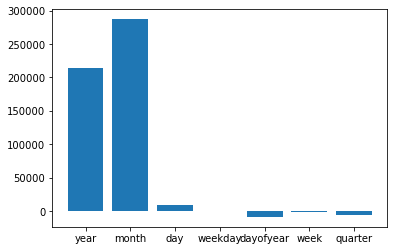

In [190]:
plt.bar(feature_coeff['Feature'], feature_coeff['coeff'])

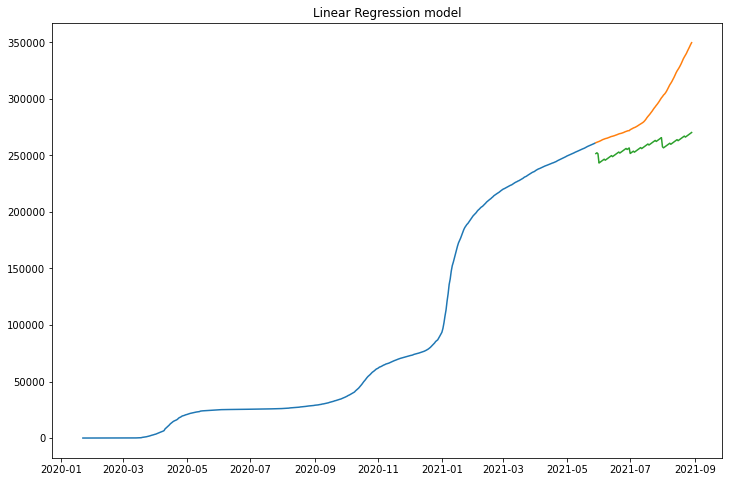

In [191]:

plt.figure(figsize=(12,8))
plt.plot(train_lr.index, train_lr['confirmed'], label = 'train')
plt.plot(test_lr.index, test_lr['confirmed'], label = 'test')
plt.plot(test_lr.index, preds, label = 'preds')
plt.title("Linear Regression model")
plt.show()

- The model captures increasing trend as other models but also shows decreasing trend at some points

### Random Forest

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
#training the model
#train the model on the x-train and the y-train created above
model = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split = 25, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=25, random_state=0)

##### model assessment

In [194]:
# predictions and evaluation
preds = model.predict(x_test)

In [195]:
# RMSLE results
score = rmsle(y_test, preds)

print('RMSLE for Random Forest Regression is', score)

RMSLE for Random Forest Regression is 15.495370783357945


In [196]:
#MAPE
print('MAPE for Random Forest is:', MAPE(y_test, preds))

MAPE for Random Forest is: 11.735471672568952


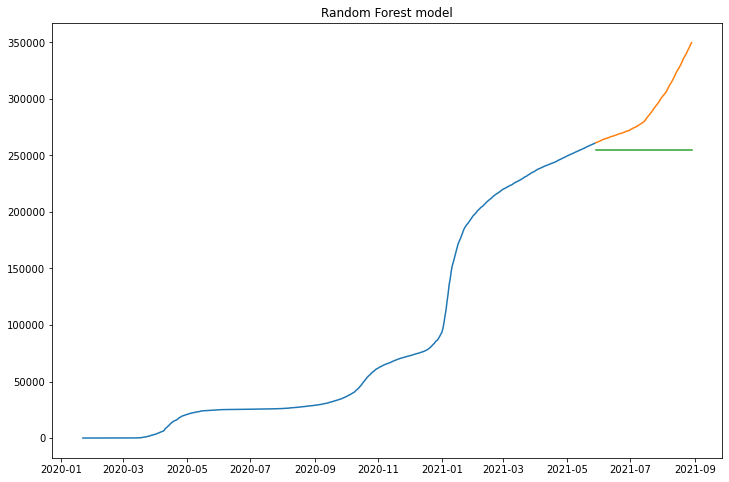

In [197]:
plt.figure(figsize = (12,8))

plt.plot(train_lr.index, train_lr['confirmed'], label = 'train')
plt.plot(test_lr.index, test_lr['confirmed'], label = 'test')
plt.plot(test_lr.index, preds, label = 'preds')
plt.title("Random Forest model")
plt.show()

- Random Forest is clearly not performing well on the data. It is unable to predict beyond its observation in the train data

Text(0.5, 0, 'Relative Importance')

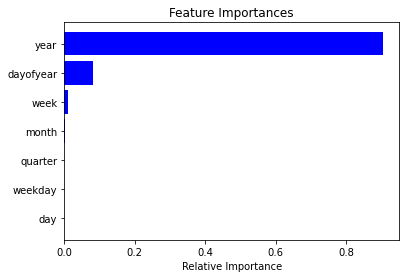

In [198]:
#feature importance
features = x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

- feature importance shows year as the most important feature

### Facebook Prophet

- Facebook Prophet Model for timeseries forecasting was introduced by the Facebook research team
- FP algorithm includes 3 components, Trend, Seasonality, Holiday. Apart from these, we have some random error
- i.e. Forecast = Trend + Seasonality + Holiday + error
- Trend componenent models non-periodic changes in time-series(linear, non-linear)
- Seasonality represents periodic changes(weekdays, weekends,summer holidays(i.e. regular holidays), yearly etc.)
- Holiday for effects of holidays (may be irregular e.g. Thanksgiving, Easter), which do not occur in exact fixed period.
- error is the information not explained by the model

In [199]:
#!pip install fbprophet

In [200]:
from fbprophet import Prophet

In [201]:
train_fp = data_train[['date','confirmed']]
test_fp = data_test[['date','confirmed']]

In [202]:
train_fp.head(2)

,date,confirmed
2020-01-22,2020-01-22,0
2020-01-23,2020-01-23,0


- Prophet reqires the input in a specific form
- which should be of form two columns in the dataset ds, y
- first is the date column and named as ds
- second is the target column or variable to forecast and named as y
- prophet needs to be installed (pip install fbprophet)

In [203]:

dfp = train_fp[['date', 'confirmed']]

dfp.columns = ['ds','y'] #converting format to specified format for prophet
dfp['ds'] = pd.to_datetime(dfp['ds']) #to ensure ds column is in the datetime format

In [204]:
dfp.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [205]:
dfp.head()

,ds,y
2020-01-22,2020-01-22,0
2020-01-23,2020-01-23,0
2020-01-24,2020-01-24,0
2020-01-25,2020-01-25,0
2020-01-26,2020-01-26,0


In [206]:
test_fp.shape

(93, 2)

In [207]:
#training the model on the given data
model = Prophet()#create a class instance with the prophet library
model.fit(dfp) #using the fit function to pass in the dataframe

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [208]:

future = model.make_future_dataframe(periods=93,freq="D") #making predictions with the trained model
forecast = model.predict(future) #using the predict function to make the prediction
#periods specifies the number of values to predict. So here the forecast is for the next 91 days
#frequency(freq) in the dataset is the daily level frequency. To this I made reference to the documentation
#on fp for frequency values. D used here is for daily frequency.

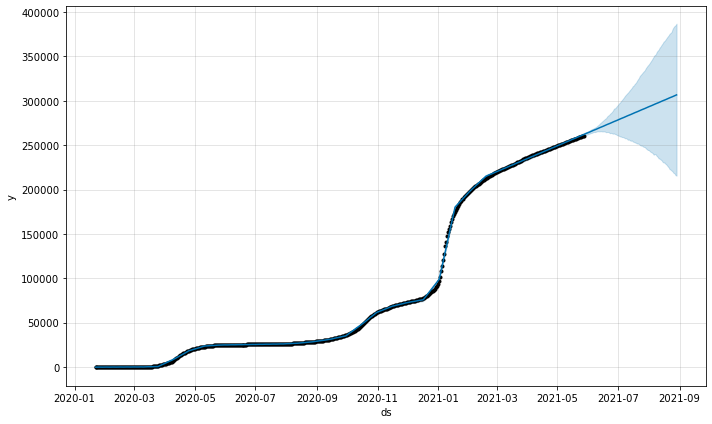

In [209]:
fig = model.plot(forecast) #using plot function to plot the predictions

- The black line shows the training data and up to the point that it stops
- Followed by the point, is the predictions on the validation data
- It is also noted here that prophet gives the forecast for the complete training and the validation data
- To compare the predictions to original data, both data can be plotted together

In [210]:
train_fp.shape, test_fp.shape

((493, 2), (93, 2))

In [211]:
#inorder to extract the forecast only for the validation data, we can select the values after index 364,
#which is after the training data
#so we have 91 values for our validation data
len(forecast['yhat'][493:].values)

93

In [212]:
#yhat is the final predictions, yhat_lower and yhat_upper which are the simply the lower and upper expected values
#according to the model
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-119.814481,-1660.754558,1400.147899,-119.814481,-119.814481,-42.333807,-42.333807,-42.333807,-42.333807,-42.333807,-42.333807,0.0,0.0,0.0,-162.148289
1,2020-01-23,-114.794441,-1720.282166,1407.035588,-114.794441,-114.794441,-2.899010,-2.899010,-2.899010,-2.899010,-2.899010,-2.899010,0.0,0.0,0.0,-117.693451
2,2020-01-24,-109.774401,-1605.799393,1556.194704,-109.774401,-109.774401,36.072333,36.072333,36.072333,36.072333,36.072333,36.072333,0.0,0.0,0.0,-73.702068
3,2020-01-25,-104.754360,-1568.022928,1686.387704,-104.754360,-104.754360,63.288365,63.288365,63.288365,63.288365,63.288365,63.288365,0.0,0.0,0.0,-41.465996
4,2020-01-26,-99.734320,-1552.180885,1443.484475,-99.734320,-99.734320,44.968490,44.968490,44.968490,44.968490,44.968490,44.968490,0.0,0.0,0.0,-54.765830


In [213]:
#saving the forecast in a variable prophet
test_fp['prophet'] =  forecast['yhat'][493:].values

##### model assessment

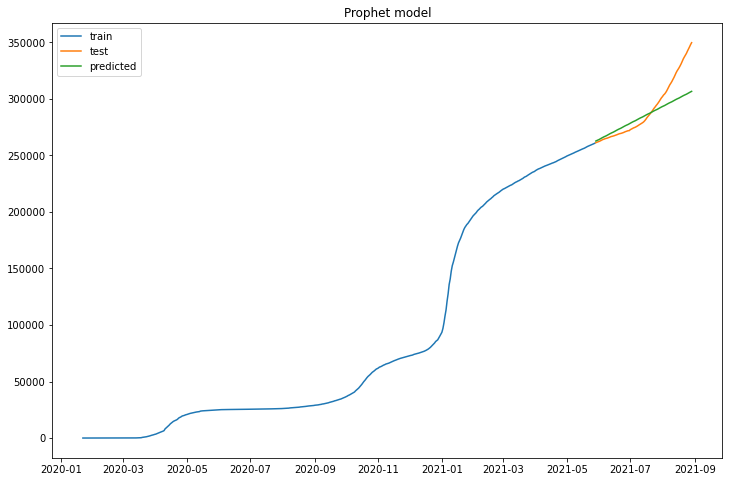

In [214]:
#plotting the forecast along with the original data
plt.figure(figsize=(12,8))

plt.plot(train_fp['confirmed'],  label='train') 
plt.plot(test_fp['confirmed'],  label='test') 
plt.plot(test_fp['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.title("Prophet model")
plt.show()

- Predicted and validation data of the model are close

In [215]:
# # calculating RMSE 
# rmse = sqrt(mean_squared_error(valid_fp['confirmed'], valid_fp['prophet']))
# print('The RMSE value for Prophet is', rmse)

In [216]:
# predictions and evaluation

score = rmsle(test_fp['confirmed'], test_fp['prophet'])

# results
print('RMSLE for Prophet is:', score)

RMSLE for Prophet is: 4.889751842250679


In [217]:
#MAPE
print('MAPE for Prophet is:', MAPE(test_fp['confirmed'], test_fp['prophet']))

MAPE for Prophet is: 3.307376830116858


- The low error metrics of the model indicate a very good performance

# Structure of the Notebook

1. Problem Statement
2. Data Preprocessing(Outliers & Missing values)
3. Feature extraction and exploration
4. Data Split into Training, Validation and Test data
5. Time Series Forecasting models
6. Machine Learning models
7. Forecast for next 3 months

# 7. Forecast for next 3 months

### A. using Arima

In [220]:
#using the training dataset for arima
train_ar.tail()

,confirmed,date
2021-05-24,259159,2021-05-24
2021-05-25,259512,2021-05-25
2021-05-26,259957,2021-05-26
2021-05-27,260389,2021-05-27
2021-05-28,260850,2021-05-28


In [221]:
test_ar.tail()

,confirmed,date,arima
2021-08-25,342329,2021-08-25,310617.224458
2021-08-26,344195,2021-08-26,311223.657313
2021-08-27,346070,2021-08-27,311831.135952
2021-08-28,348067,2021-08-28,312439.660092
2021-08-29,349773,2021-08-29,313049.229674


In [238]:
# #generating date range for forecasting
future_set = pd.DataFrame(data = pd.date_range(start = '2021-05-29', end= '2021-11-29', freq = 'D'),
                        columns=['date'])

In [239]:
future_set.head()

,date
0,2021-05-29
1,2021-05-30
2,2021-05-31
3,2021-06-01
4,2021-06-02


In [240]:
future_arima=future_set

In [241]:
train_ar.shape, future_arima.shape

((493, 2), (185, 1))

In [242]:
future_arima.head()

,date
0,2021-05-29
1,2021-05-30
2,2021-05-31
3,2021-06-01
4,2021-06-02


In [243]:
future_arima.tail()

,date
180,2021-11-25
181,2021-11-26
182,2021-11-27
183,2021-11-28
184,2021-11-29


In [244]:
#forecasting model
model = auto_arima(y = train_ar['confirmed'],
                   m = 7, #seasonal perod of 7 days
                   seasonal = True,
                   stepwise = False)

In [245]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  493
Model:               SARIMAX(3, 2, 2)   Log Likelihood               -3479.556
Date:                Tue, 07 Sep 2021   AIC                           6971.112
Time:                        07:57:35   BIC                           6996.291
Sample:                             0   HQIC                          6981.000
                                - 493                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0923      0.038     28.989      0.000       1.018       1.166
ar.L2         -0.1011      0.028     -3.648      0.000      -0.155      -0.047
ar.L3         -0.3557      0.019    -18.540      0.000      -0.393      -0.318
ma.L1         -1.4830      0.034    -44.203      0.000      -1.549      -1.417
ma.L2          0.8361      0.025     34.025      0.000       0.788       0.884
sigma2      8.364e+04   1732.863     48.264      0.000    8.02e+04     8.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             21768.20
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              12.38   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [246]:
# fit the arima model
model = ARIMA(train_ar['confirmed'], order=(3,2,2))
model_fit = model.fit()


#training the model
# model = sarimax.SARIMAX(train_sa['confirmed'], seasonal_order=(0,0,0,7), order=(3,2,2))
# fit1 = model.fit()

In [247]:
# generate forecasts
output = model_fit.forecast(185)

# make predictions
# test_sa['sarima'] = fit1.predict(start="2021-05-29", end="2021-08-29", dynamic=True)
# future_arima['arima'] = model_fit.predict(start="2021-08-30", end="2021-11-30", dynamic=True)

In [248]:
future_arima['arima'] = (pd.DataFrame(output[0])).values

In [249]:
test_ar.head()

,confirmed,date,arima
2021-05-29,261306,2021-05-29,261306.149829
2021-05-30,261673,2021-05-30,261791.438290
2021-05-31,262043,2021-05-31,262299.113616
2021-06-01,262380,2021-06-01,262830.399001
2021-06-02,262787,2021-06-02,263375.225524


In [250]:
future_arima.head()

,date,arima
0,2021-05-29,261306.149829
1,2021-05-30,261791.438290
2,2021-05-31,262299.113616
3,2021-06-01,262830.399001
4,2021-06-02,263375.225524


In [251]:
future_arima.tail()

,date,arima
180,2021-11-25,370788.109904
181,2021-11-26,371490.787707
182,2021-11-27,372194.511671
183,2021-11-28,372899.281795
184,2021-11-29,373605.098080


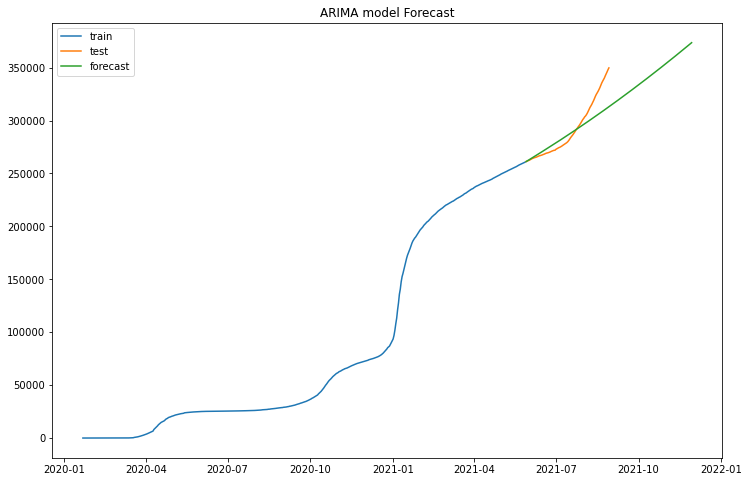

In [252]:
plt.figure(figsize=(12,8))

plt.plot(train_ar.index, train_ar['confirmed'], label='train')
plt.plot(test_ar.index, test_ar['confirmed'], label='test')
plt.plot(future_arima.date, future_arima['arima'], label='forecast')

plt.legend(loc='best')
plt.title("ARIMA model Forecast")
plt.show()

### B. using Facebook Prophet

In [253]:
#using the training dataset for facebook prophet
train_fp.shape

(493, 2)

In [254]:
test_fp.shape

(93, 3)

In [255]:
test_fp.shape

(93, 3)

In [570]:
# test_fp.head()

In [267]:
#generating date range for prediction
future_fp = pd.DataFrame(data = pd.date_range(start = '2021-05-29', end= '2021-11-29', freq = 'D'),
                        columns=['date'])


# future_fp = pd.DataFrame(data = pd.date_range(start = '2021-08-30', end= '2021-11-30', freq = 'D'),
#                         columns=['date'])

In [268]:
future_fp.shape

(185, 1)

In [269]:
fpp = train_fp[['date', 'confirmed']]

In [270]:
fpp.columns = ['ds','y'] #converting format to specified format for prophet
fpp['ds'] = pd.to_datetime(fpp['ds']) #to ensure ds column is in the datetime format

In [271]:
fpp.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [272]:
fpp.head()

,ds,y
2020-01-22,2020-01-22,0
2020-01-23,2020-01-23,0
2020-01-24,2020-01-24,0
2020-01-25,2020-01-25,0
2020-01-26,2020-01-26,0


In [273]:
#training the model on the given data
model = Prophet()#create a class instance with the prophet library
model.fit(fpp) #using the fit function to pass in the dataframe

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [274]:
future_fp.shape

(185, 1)

In [277]:
future = model.make_future_dataframe(periods=185,freq="D") #making predictions with the trained model
forecast = model.predict(future) #using the predict function to make the prediction

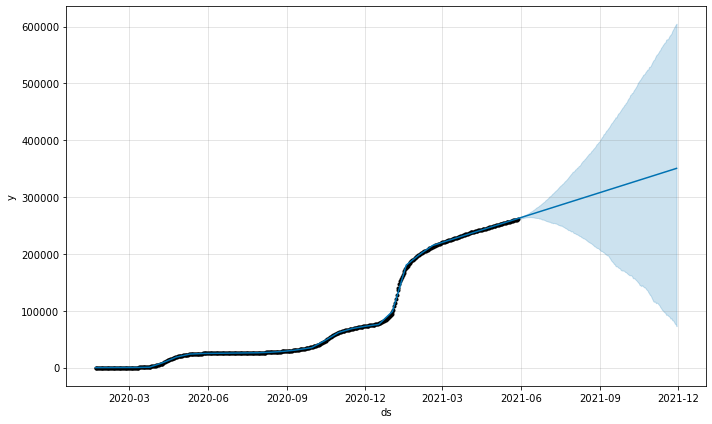

In [278]:
fig = model.plot(forecast) #using plot function to plot the predictions

In [279]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
673,2021-11-25,348685.407351,82813.767284,594903.608225,83161.442814,594686.210656,-2.899010,-2.899010,-2.899010,-2.899010,-2.899010,-2.899010,0.0,0.0,0.0,348682.508341
674,2021-11-26,349163.010236,80568.361018,597722.477769,80627.220725,597915.986168,36.072333,36.072333,36.072333,36.072333,36.072333,36.072333,0.0,0.0,0.0,349199.082569
675,2021-11-27,349640.613120,77326.032414,600656.461584,77689.570725,600913.283374,63.288365,63.288365,63.288365,63.288365,63.288365,63.288365,0.0,0.0,0.0,349703.901485
676,2021-11-28,350118.216005,76081.969986,603330.971260,75210.830392,602334.491672,44.968490,44.968490,44.968490,44.968490,44.968490,44.968490,0.0,0.0,0.0,350163.184495
677,2021-11-29,350595.818889,72810.595856,605299.079758,73504.173233,604868.989277,-17.092945,-17.092945,-17.092945,-17.092945,-17.092945,-17.092945,0.0,0.0,0.0,350578.725944
